<a href="https://colab.research.google.com/github/annukumari97/analysis-of-bacterial-genome/blob/main/bacterial_genome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 18.5 MB/s eta 0:00:00


In [4]:
!pip install colorama

In [5]:
from Bio.Seq import Seq
from Bio.SeqUtils import seq1
!pip install nglview
import Bio
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
from Bio import AlignIO
from Bio.Align import PairwiseAligner
from Bio.Align import MultipleSeqAlignment
from Bio.Blast import NCBIWWW
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.Data import CodonTable
import nglview as nv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from termcolor import colored
from colorama import Back, Style, Fore

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 20.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.8 MB/s eta 0:00:00
  Created wheel for nglview: filename=nglview-3.0.8-py3-none-any.whl size=10216160 sha256=6a80d4f1997a8f8ae4b31962c8024381e793176322b2eb2232ea55e4713c03d0
  Stored in directory: /root/.cache/pip/wheels/2e/6c/59/32bf4aa0134f9c4cdca054f5192839fb4285241e2f17f7d358
Successfully built nglview


In [11]:
#/content/drive/MyDrive/bacterial_seq/ncbi_dataset (1).zip (Unzipped Files)/ncbi_dataset/data/GCF_000292405.1/GCF_000292405.1_ASM29240v1_genomic.fna

In [12]:
def fna_to_fasta(input_file, output_file):
    try:
        with open(input_file, 'r') as fna_file, open(output_file, 'w') as fasta_file:
            current_sequence = ""

            for line in fna_file:
                line = line.strip()

                if line.startswith(">"):
                    # Process header lines
                    header = line[1:]  # Remove the ">" character
                    # Modify header as needed (if required)
                    # Example: header = "modified_" + header
                    fasta_file.write(">" + header + "\n")

                    # Write the sequence of the previous header (if any)
                    if current_sequence:
                        fasta_file.write(current_sequence + "\n")
                        current_sequence = ""
                else:
                    # Accumulate sequence lines
                    current_sequence += line

            # Write the last sequence (if any)
            if current_sequence:
                fasta_file.write(current_sequence + "\n")

        print(f"Conversion complete. Output written to {output_file}")

    except FileNotFoundError:
        print(f"Error: File '{input_file}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")



In [13]:
input_fna_file = "/content/drive/MyDrive/bacterial_seq/ncbi_dataset (1).zip (Unzipped Files)/ncbi_dataset/data/GCF_000292405.1/GCF_000292405.1_ASM29240v1_genomic.fna"
output_fasta_file = "/content/drive/MyDrive/bacterial_seq/ncbi_dataset.fasta"
fna_to_fasta(input_fna_file, output_fasta_file)

Conversion complete. Output written to /content/drive/MyDrive/bacterial_seq/ncbi_dataset.fasta


In [34]:
# /content/drive/MyDrive/bacterial_seq/ncbi_dataset.fasta

In [14]:
for record in SeqIO.parse("/content/drive/MyDrive/bacterial_seq/ncbi_dataset.fasta", "fasta"):
    print(record.id)

NC_018495.1


In [15]:
bacteria_record = SeqIO.read("/content/drive/MyDrive/bacterial_seq/ncbi_dataset.fasta", "fasta")
bacteria_record

SeqRecord(seq=Seq('TAAGTTATTATTTAGTTAATACTTTTAACAATATTATTAAGGTATTTAAAAAAT...TAC'), id='NC_018495.1', name='NC_018495.1', description='NC_018495.1 Mycoplasmoides genitalium M2321, complete sequence', dbxrefs=[])

In [16]:
bacteria_dna = bacteria_record.seq

In [17]:
bacteria_dna

Seq('TAAGTTATTATTTAGTTAATACTTTTAACAATATTATTAAGGTATTTAAAAAAT...TAC')

In [18]:
def ten_nucleotide_seq(genome):
    genes = []
    for ix, char in enumerate(genome):
        if ix != 0 and ix%10 == 0:
            genes.append(' ')
        genes.append(char)
    return ''.join(genes)

In [19]:
nu_clr_switcher = {
    'A': Back.GREEN,
    'C': Back.YELLOW,
    'G': Back.RED,
    'T': Back.BLUE,
    ' ': Style.RESET_ALL
}
def seq_repr(genome_str, strand ='dna'):
    if strand == 'dna':
        genome_str = ten_nucleotide_seq(genome=genome_str)
        line_break_cntr = 0
        for i in range(len(genome_str)):
            if genome_str[i] == ' ':
                line_break_cntr += 1
                if line_break_cntr>0 and line_break_cntr%6==0:
                    text = "\n"
                else:
                    text = nu_clr_switcher[genome_str[i]] + genome_str[i]
            else:
                text = nu_clr_switcher[genome_str[i]] + genome_str[i]
            print(text, end="")
        Style.RESET_ALL

In [20]:
print("bacterial_genome: ")
seq_repr(bacteria_dna[0:300])

bacterial_genome: 
TAAGTTATTA TTTAGTTAAT ACTTTTAACA ATATTATTAA GGTATTTAAA AAATACTATT
ATAGTATTTA ACGTAGTTAA ATACTTTCCT TAATACTGTT AAATTATATT CAATCAATAC
ATATATAATA TTATTAAAAT ACTTGATAAG TATTATTTAG ATATTAGACA AATACTAATT
TTATATTGCT TTAATACTTA ATAAATACTA CTTATGTATT AAGTAAATAT TACTGTAATA
CTAATAACAA TATTATTACA ATATGCTAGA ATAATATTGC TAGTATCAAT AATTACTAAT

In [21]:
length = len(bacteria_dna)
print(length)

579977


In [ ]:
#composition of each nucleotide


In [22]:
def nucleotides_composition(seq):
    nucleotides = {'A': 0, 'C': 0, 'G': 0, 'T': 0}
    for n in nucleotides:
        nucleotides[n] = seq.count(n)/len(seq)*100
    return nucleotides

In [23]:
ndict=nucleotides_composition(bacteria_dna)
ndict

{'A': 34.579819544568146,
 'C': 15.756142053909034,
 'G': 15.91804502592344,
 'T': 33.745993375599376}

In [24]:
import pandas as pd
ndf = pd.DataFrame.from_dict(ndict, orient ='index')
ndf = ndf.reset_index()
ndf = ndf.rename(columns={"index": "Nucleotide", 0: "Composition"})

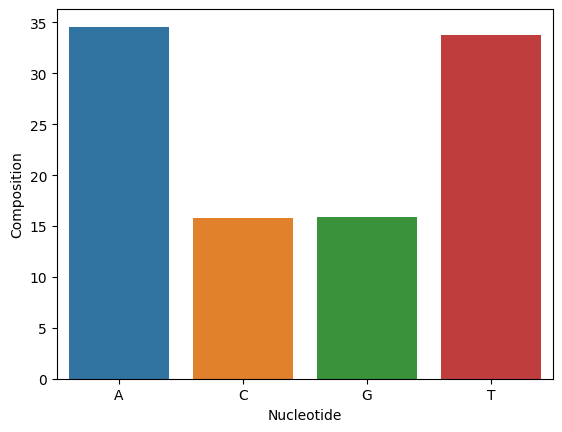

In [25]:
ax = sns.barplot(x="Nucleotide", y="Composition", data=ndf)

In [ ]:
#GC content of the DNA

In [26]:
from Bio.SeqUtils import gc_fraction
gc_content = gc_fraction(bacteria_dna) * 100

In [27]:
print(gc_content)

31.67418707983248
